# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [2]:
import os
import sys
# sys.path.append('cocoapi\\PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = u'.\\cocoapi'
dataType = u'val2014'
instances_annFile = os.path.join(dataDir, u'annotations\\instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, u'annotations\\captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=7.43s)
creating index...
index created!
loading annotations into memory...
Done (t=0.50s)
creating index...
index created!


## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

527374
{'license': 3, 'file_name': 'COCO_val2014_000000527374.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000527374.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-24 23:57:44', 'flickr_url': 'http://farm9.staticflickr.com/8525/8571746148_413f40aeab_z.jpg', 'id': 527374}


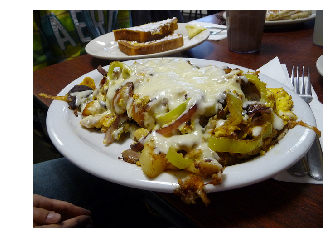

A white plate topped with gravy covered food on top of a table.
A white plate with some food on it. 
A plate with two pieces of bread and a plate with potatoes and gravy on top on a table with a fork and napkin. 
A plate of food on a table with other plates in the background.
A plate of food that is covered in cheese.


In [3]:
import os
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id][u'image_id']
print(img_id)
img = coco.loadImgs(img_id)[0]
print(img)
# url = img['coco_url']
file = img[u'file_name']

# print URL and visualize corresponding image
root = u".\\cocoapi\\images\\val2014"
# I = io.imread(url)
I = io.imread(os.path.join(root,file))
plt.axis(u'off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img[u'id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)